Importing Libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
import os
import string
import re

import matplotlib.pyplot as plt

%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from wordcloud import WordCloud
stop_words = stopwords.words('english')

from gensim.models.ldamodel import LdaModel

ModuleNotFoundError: No module named 'spacy'

In [ ]:
import matplotlib.colors as mcolors
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes

Loading Dataset

In [4]:
dataset=pd.read_csv("Reviews.csv")
print("Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

Dataset has 568454 rows and 10 columns


Sampling 

In [5]:
#Since we need only reviews data for topic modelling, we am taking only text column and 
#limiting the number of reviews to 5000 because of time and computational constraint
text = dataset.sample(5000).reset_index()['Text']

In [6]:
text = dataset[['Text']].iloc[:5000].copy()

In [7]:
text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


Preprocessing

In [8]:
#DATA CLEANING & PRE-PROCESSING
#Here we have done the data pre-processing. We can use any among the lemmatization and the stemming but we prefer to use lemmatiation. 
#Also the stop words have been removed along with the words with length shorter than 3 characters to reduce some stray words.
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text.lower())
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [9]:
#it takes time
text['cleaned_text']=text['Text'].apply(clean_text)

In [10]:
text.head()

,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned food product fo...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [11]:
text.drop(['Text'],axis=1,inplace=True)

Document-Term matrix

In [12]:
#EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )
vect =TfidfVectorizer(stop_words=stop_words,max_features=500)
vect_text=vect.fit_transform(text['cleaned_text'])
print(vect.get_feature_names_out())

['able' 'absolutely' 'acid' 'actually' 'added' 'aftertaste' 'allergy'
 'almost' 'along' 'also' 'alternative' 'although' 'always' 'amazing'
 'amazon' 'amount' 'another' 'anyone' 'anything' 'apple' 'aroma' 'around'
 'arrived' 'artificial' 'available' 'away' 'awesome' 'baby' 'back' 'bag'
 'baked' 'baking' 'bean' 'beat' 'believe' 'best' 'better' 'biscuit'
 'bisquick' 'bite' 'bitter' 'black' 'blend' 'blue' 'body' 'bottle'
 'bottom' 'bought' 'bowl' 'box' 'brand' 'bread' 'breakfast' 'brew'
 'broken' 'brown' 'butter' 'buying' 'cake' 'calorie' 'came' 'candy'
 'canned' 'care' 'carry' 'case' 'cat' 'cereal' 'change' 'cheap' 'cheaper'
 'cheddar' 'cheese' 'chicken' 'chip' 'chocolate' 'choice' 'christmas'
 'cinnamon' 'clam' 'clean' 'cocoa' 'coconut' 'coffee' 'cold' 'color' 'com'
 'come' 'company' 'compared' 'container' 'content' 'cook' 'cookie'
 'cooking' 'cooky' 'corn' 'cost' 'could' 'count' 'couple' 'course'
 'cracker' 'cream' 'crisp' 'crunch' 'crunchy' 'cup' 'cups' 'customer'
 'dark' 'date' 'daugh

In [13]:
vect_text.shape

(5000, 500)

In [14]:
idf=vect.idf_

In [15]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
print(l)
print(l[0],l[-1])

['like', 'good', 'taste', 'great', 'product', 'flavor', 'love', 'would', 'make', 'really', 'time', 'much', 'amazon', 'best', 'food', 'tried', 'find', 'also', 'little', 'better', 'price', 'chip', 'even', 'well', 'store', 'coffee', 'brand', 'first', 'could', 'made', 'year', 'found', 'bought', 'used', 'recommend', 'free', 'chocolate', 'thing', 'favorite', 'since', 'think', 'delicious', 'order', 'water', 'give', 'know', 'many', 'sweet', 'still', 'pack', 'sugar', 'nice', 'snack', 'without', 'want', 'ever', 'quality', 'review', 'drink', 'every', 'ingredient', 'never', 'work', 'easy', 'bag', 'something', 'regular', 'right', 'ordered', 'come', 'keep', 'need', 'enough', 'salt', 'always', 'using', 'perfect', 'tasty', 'calorie', 'enjoy', 'different', 'le', 'potato', 'take', 'healthy', 'hard', 'small', 'however', 'sure', 'though', 'definitely', 'eating', 'local', 'size', 'thought', 'fresh', 'excellent', 'whole', 'gluten', 'stuff', 'pancake', 'back', 'highly', 'problem', 'family', 'purchase', 'mont

In [16]:
print(dd['like'])
print(dd['oreo']) 

2.188299435172312
6.0208856099524235


We can therefore see that on the basis of the idf value , 'like' is the most frequent word while 'oreo' is least frequently occuring word.

**LSA**

In [17]:
#TOPIC MODELLING
lsa_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [18]:
lsa_model.explained_variance_ratio_

array([0.00491091, 0.01776964, 0.01608631, 0.01196561, 0.01069027])

In [19]:
lsa_model.singular_values_

array([15.57572677,  9.21589229,  8.79074554,  7.56523138,  7.14733046])

In [20]:
lsa_top.shape

(5000, 5)

In [21]:
#Topics for document 0:
for i, topic in enumerate(lsa_top[0]):
    print("Topic ", i, " : ", topic*100)

Topic  0  :  28.693794763033754
Topic  1  :  3.1022841963034526
Topic  2  :  -21.258810262735363
Topic  3  :  6.123652637511034
Topic  4  :  4.566605433665032


In [22]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(5, 500)
[[ 0.02595741  0.02478024  0.01137904 ...  0.01907923  0.06881788
   0.01779905]
 [ 0.00129562 -0.00543069  0.02181901 ...  0.00167914  0.00752522
  -0.00528209]
 [-0.00931074 -0.00460948  0.01985026 ... -0.01112155 -0.08779668
  -0.00202124]
 [-0.00876676 -0.01032421  0.01288358 ... -0.00933897  0.09154039
  -0.01946509]
 [ 0.00695516  0.0022131   0.01272216 ...  0.0494318   0.02637342
  -0.00580651]]


In [23]:
#Now we can get a list of the important words for each of the 5 topics as shown. 
#For simplicity here we have shown 5 words for each topic.
vocab = vect.get_feature_names()
topic_content = []
for v in lsa_model.components_:
    sorted_vocab = sorted(zip(vocab, v), key=lambda x : x[1], reverse=True)
    topic_content.append({x:y for x, y in sorted_vocab})
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
print("Top 5 words in topic 1 : ", list(topic_content[0].keys())[:5])
print("Top 5 words in topic 2 : ", list(topic_content[1].keys())[:5])
print("Top 5 words in topic 3 : ", list(topic_content[2].keys())[:5])
print("Top 5 words in topic 4 : ", list(topic_content[3].keys())[:5])
print("Top 5 words in topic 5 : ", list(topic_content[4].keys())[:5])


Top 5 words in topic 1 :  ['like', 'good', 'taste', 'flavor', 'chip']
Top 5 words in topic 2 :  ['coffee', 'decaf', 'drink', 'taste', 'chocolate']
Top 5 words in topic 3 :  ['coffee', 'chip', 'flavor', 'salt', 'potato']
Top 5 words in topic 4 :  ['food', 'coffee', 'dog', 'newman', 'chip']
Top 5 words in topic 5 :  ['pancake', 'gluten', 'product', 'coffee', 'free']


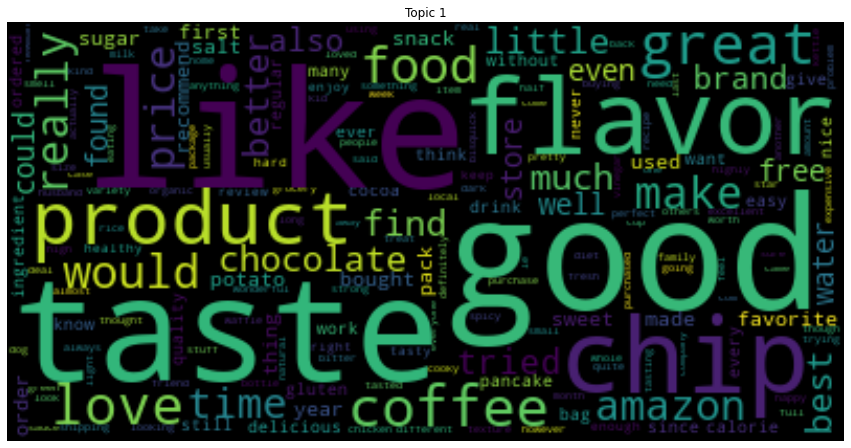

In [25]:
wc1= WordCloud(background_color="black", max_words=500)
wc1.generate_from_frequencies(topic_content[0])

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wc1, interpolation="bilinear")
plt.title("Topic 1")
plt.axis("off")
plt.show()

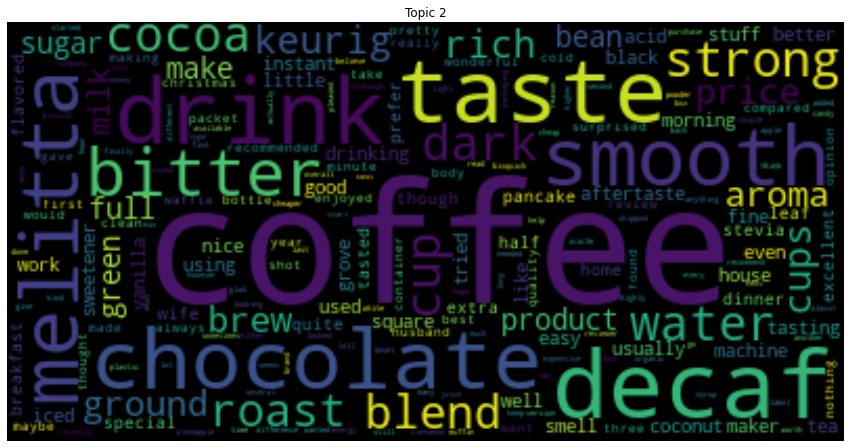

In [26]:
wc2= WordCloud(background_color="black", max_words=500)
wc2.generate_from_frequencies(topic_content[1])

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wc2, interpolation="bilinear")
plt.title("Topic 2")
plt.axis("off")
plt.show()

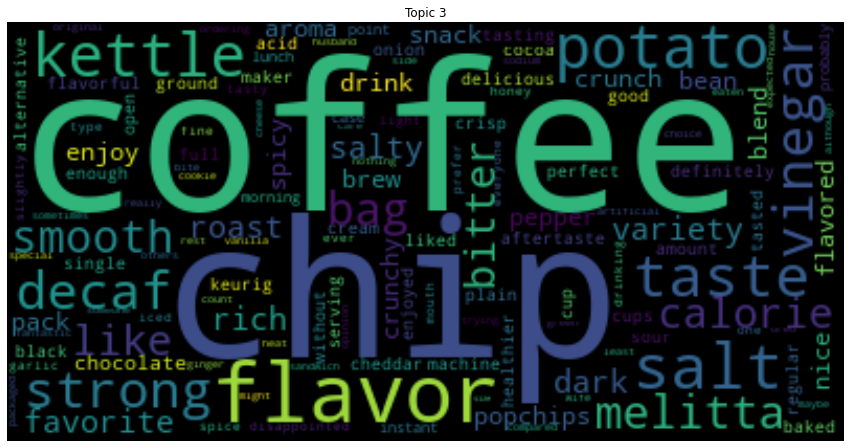

In [27]:
wc3= WordCloud(background_color="black", max_words=500)
wc3.generate_from_frequencies(topic_content[2])

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wc3, interpolation="bilinear")
plt.title("Topic 3")
plt.axis("off")
plt.show()

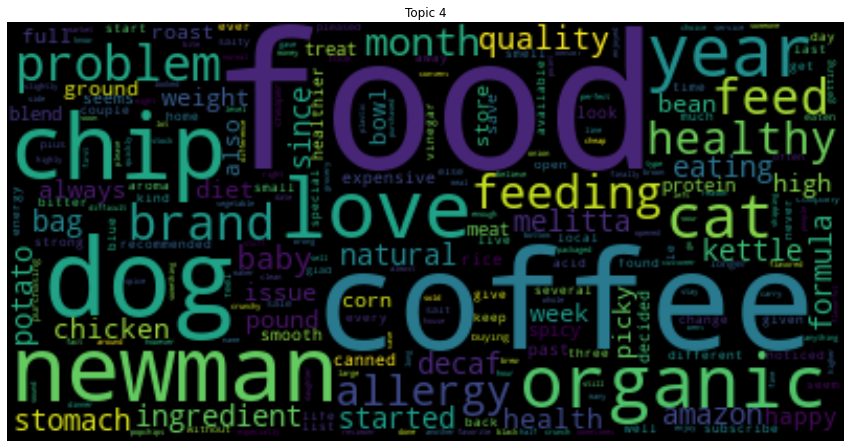

In [28]:
wc4= WordCloud(background_color="black", max_words=500)
wc4.generate_from_frequencies(topic_content[3])

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wc4, interpolation="bilinear")
plt.title("Topic 4")
plt.axis("off")
plt.show()

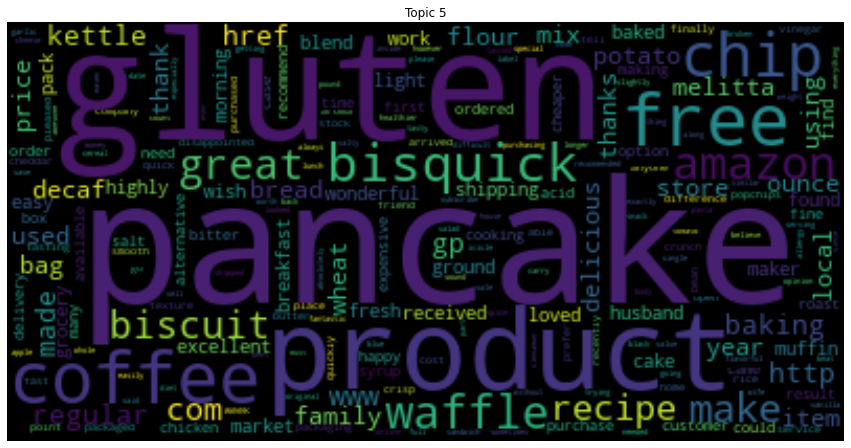

In [29]:
wc5= WordCloud(background_color="black", max_words=500)
wc5.generate_from_frequencies(topic_content[4])

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wc5, interpolation="bilinear")
plt.title("Topic 5")
plt.axis("off")
plt.show()

T-SNE Clustering

In [30]:
import sklearn
from sklearn.manifold import TSNE

In [31]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.027380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.705933
[t-SNE] KL divergence after 2000 iterations: 1.165268


In [32]:
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

In [48]:
# Define helper functions

def get_keys(topic_matrix):

    '''

    returns an integer list of predicted topic 

    categories for a given topic matrix

    '''

    keys = topic_matrix.argmax(axis=1).tolist()

    return keys



def keys_to_counts(keys):

    '''

    returns a tuple of topic categories and their 

    accompanying magnitudes for a given list of keys

    '''

    count_pairs = Counter(keys).items()

    categories = [pair[0] for pair in count_pairs]

    counts = [pair[1] for pair in count_pairs]

    return (categories, counts)

In [49]:
lsa_keys = get_keys(lsa_top)
n_topics=5
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=500, plot_height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=mycolors[lsa_keys])
    
show(plot)

LDA

In [34]:
from gensim import corpora, models
import gensim

In [35]:
splitText = text['cleaned_text'].apply(lambda x:word_tokenize(x))

In [36]:
dictionary = corpora.Dictionary(splitText)
corpus = [dictionary.doc2bow(text) for text in splitText]

In [37]:
ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, 
                                    num_topics=5, passes=5, minimum_probability=0)

In [38]:
ldamodel.print_topics()

[(0,
  '0.016*"product" + 0.015*"good" + 0.013*"like" + 0.012*"make" + 0.012*"pancake" + 0.011*"great" + 0.010*"taste" + 0.009*"would" + 0.008*"love" + 0.008*"price"'),
 (1,
  '0.028*"coffee" + 0.023*"flavor" + 0.019*"taste" + 0.018*"like" + 0.017*"chip" + 0.013*"good" + 0.012*"great" + 0.011*"." + 0.010*"love" + 0.007*"salt"'),
 (2,
  '0.015*"chocolate" + 0.014*"." + 0.012*"coffee" + 0.010*"taste" + 0.010*"like" + 0.009*"good" + 0.007*"green" + 0.006*"flavor" + 0.006*"brand" + 0.005*"great"'),
 (3,
  '0.036*"food" + 0.011*"." + 0.010*"newman" + 0.008*"product" + 0.008*"dog" + 0.008*"organic" + 0.007*"like" + 0.007*"ingredient" + 0.007*"year" + 0.007*"love"'),
 (4,
  '0.013*"product" + 0.011*"." + 0.010*"water" + 0.008*"would" + 0.008*"biscuit" + 0.008*"like" + 0.008*"cake" + 0.007*"sugar" + 0.006*"make" + 0.006*"free"')]

Refactoring results of LDA into numpy matrix 

In [39]:
hm = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])


And reduce dimensionality using t-SNE algorithm:

In [40]:


tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(hm)

topic_num = np.argmax(hm, axis=1)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=500, plot_height=500)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.005023


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.369263
[t-SNE] KL divergence after 1000 iterations: 0.603185


In [41]:
pip install pyLDAvis

In [42]:
import pyLDAvis
import pyLDAvis.gensim_models
print(ldamodel.print_topics(num_topics=5, num_words=3))

[(0, '0.016*"product" + 0.015*"good" + 0.013*"like"'), (1, '0.028*"coffee" + 0.023*"flavor" + 0.019*"taste"'), (2, '0.015*"chocolate" + 0.014*"." + 0.012*"coffee"'), (3, '0.036*"food" + 0.011*"." + 0.010*"newman"'), (4, '0.013*"product" + 0.011*"." + 0.010*"water"')]


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [43]:
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=ldamodel, texts=splitText, dictionary=dictionary, coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3792695894523595


In [44]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 6.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [45]:
print(pd.__version__)

1.3.5


In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = pyLDAvis.gensim_models.prepare(ldamodel,corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [47]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.024292 -0.034643       1        1  29.199472
1     -0.104959  0.036407       2        1  25.535407
3      0.177787  0.057656       3        1  16.658139
4      0.014896 -0.140944       4        1  15.277390
2     -0.063432  0.081525       5        1  13.329592, topic_info=         Term         Freq        Total Category  logprob  loglift
5        food  1138.000000  1138.000000  Default  30.0000  30.0000
402    coffee  1779.000000  1779.000000  Default  29.0000  29.0000
1799     chip   736.000000   736.000000  Default  28.0000  28.0000
2877  pancake   579.000000   579.000000  Default  27.0000  27.0000
73     flavor  1383.000000  1383.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
169      find    80.341310   634.625145   Topic5  -5.6155  -0.0516
132      well    77.340005   548.836072   Topic5  -5.6535   0.0556
237     tried    77.695344   637.041443   Topic5  -5.6490  -0.0889
180      make    72.226243  1029.589063   Topic5  -5.7219  -0.6419
13    product    69.939623  1549.768080   Topic5  -5.7541  -1.0830

[401 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
155       1  0.215927       .
155       2  0.261386       .
155       3  0.179561       .
155       4  0.164787       .
155       5  0.178424       .
...     ...       ...     ...
239       4  0.071365    year
239       5  0.075825    year
3603      3  0.036480  yellow
3603      4  0.875530  yellow
3603      5  0.036480  yellow

[865 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])